In [1]:
from scipy.integrate import quad

# Quick Continuous Probability Example
def pdf(x):
    return 0.5*x

(result, error) = quad(pdf, 0, 1)
result

0.25

In [2]:
# Joint Probability Distribution
# quad can't handle double integration; only able to fix the second argument to a specific value
def pdf(x, y):
    return x + 1.5*y**2

# Must instead first do some integration on your own
# This gets P(X < .5, Y > .5) by integrating over Y from .5 to 1 first manually
def pdf_yp5to1(x):
    return .5*x + .4375

(jointprob, error) = quad(pdf_yp5to1, 0, .5)
jointprob

0.28124999999999994

In [3]:
# THen we can use the marginal distribution of X to get the denominator in our example
def pdf_x(x):
    return x + .5

(marginal, error) = quad(pdf_x, 0, .5)
marginal

0.375

In [4]:
# And finally our conditional probability
jointprob/marginal

0.7499999999999999

**Breakout room #3**

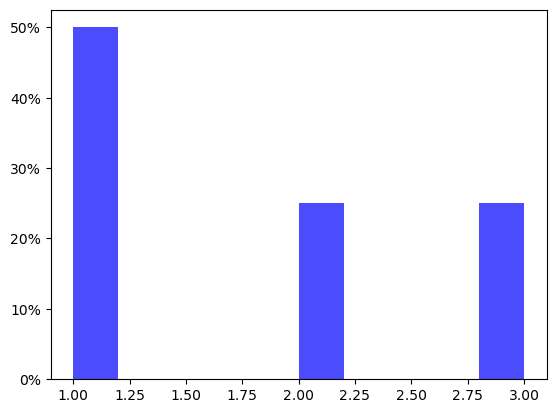

In [5]:
# Using Histograms
# To Estimate the PMF
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

x = np.array([1, 1, 2, 3])
n, bins, patches = plt.hist(x, 10, facecolor = 'blue', alpha = .7,
                            weights = np.ones(len(x)) / len(x))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) # we use this because PMFs directly plot the probability
plt.show()

**Explanation**


1. plt.hist(x, 10, facecolor='blue', alpha=0.7, weights=np.ones(len(x)) / len(x))
This command generates a histogram of the data in x with 10 bins, a blue color, transparency of 0.7, and normalized weights.

- x: The input dataset (an array or list of numerical values).
-10: Specifies that the histogram should have 10 bins.
-facecolor='blue': The bars of the histogram will be blue.
-alpha=0.7: Sets the transparency of the bars to 70% opacity.
-weights=np.ones(len(x)) / len(x):
np.ones(len(x)) creates an array of ones with the same length as x.
-Dividing by len(x) ensures the sum of all histogram bars equals 1, effectively normalizing the histogram into a probability distribution.
2. Output Variables:
-n: An array with the height of each bin (the counts or normalized frequencies).
-bins: An array with the edges of the bins.
-patches: A list of bar objects (used for customizing the histogram appearance).
. What Does weights Do?
By default, a histogram counts occurrences. The weights argument normalizes the histogram:

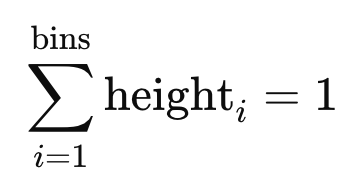

This ensures that the histogram represents a probability distribution, where the sum of all bar heights equals 1.

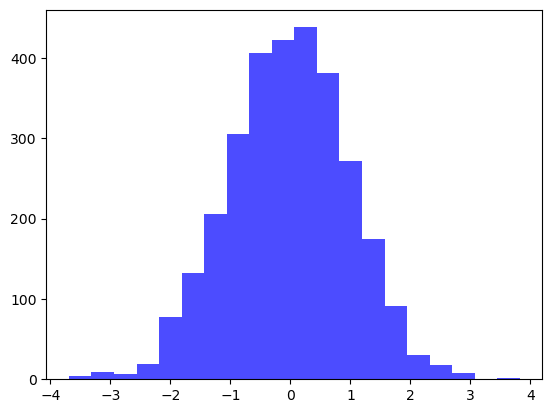

In [6]:
# To Estimate the PDF (for continuous data)
x = np.random.randn(3000) # this generates 3000 random numbers under a Standard Normal Distribution
n, bins, patches = plt.hist(x, 20, facecolor='blue', alpha=.7)
plt.show()


In [7]:
# Note we did not format the y-axis to be a percentage because PDFs do not directly plot the probability
# Probabilities exist "under" the curve of the histogram
# Or, the simplest way to estimate, figure out the proportion of values in the sample that fall in the range of your probability
# e.g. what is the estimated probability x < 0 below?
sum(x < 0) / len(x)

np.float64(0.5073333333333333)

In [8]:
# in the true, theoretical Standard Normal distribution, the answer is .5

**STOP HERE**

In [9]:
# Calculating Gaussian Probabilities
from scipy.stats import norm

# The norm.cdf(x, mu, sigma) function is P(X < x) for mu and sigma
norm.cdf(700, 500, 100)

np.float64(0.9772498680518208)

In [10]:
norm.cdf(300, 500, 100)

np.float64(0.022750131948179198)

In [11]:
norm.cdf(700, 500, 100) - norm.cdf(300, 500, 100)

np.float64(0.9544997361036416)

In [12]:
# PPF (90th percentile of SAT scores)
norm.ppf(.9, 500, 100)

np.float64(628.1551565544601)

In [13]:
# What about the 99th percentile?
norm.ppf(.99, 500, 100)

np.float64(732.6347874040841)

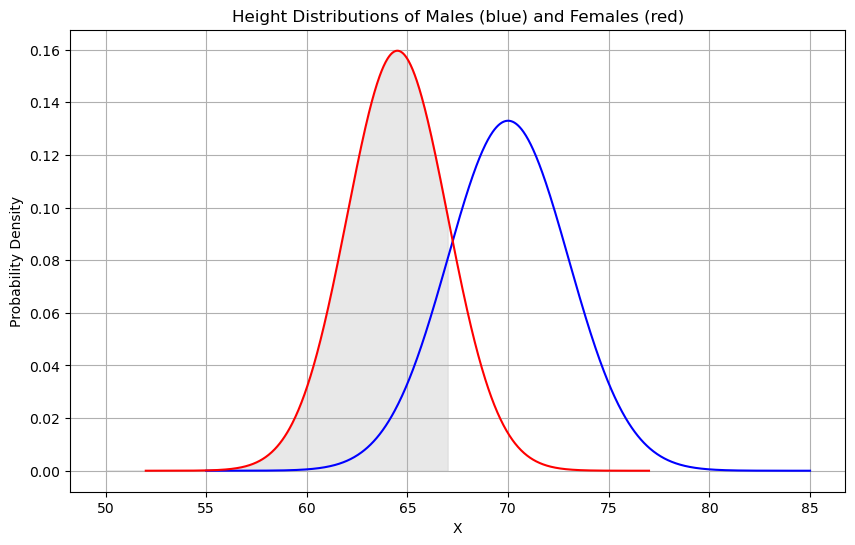

In [14]:
# Besides the Gaussian, python also has many other distributions
# Look through the documentation if you need another distribution: https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Create theoretical height distributions for Males and Females
# Parameters (means and standard deviations)
mu_m = 70
mu_f = 64.5

sigma_m = 3
sigma_f = 2.5

# things for plotting
x = np.linspace(55, 85, 1000)
x2 = np.linspace(52, 77, 1000)

# Calculate the Gaussian PDF
pdf = stats.norm.pdf(x, mu_m, sigma_m)
pdf2 = stats.norm.pdf(x2, mu_f, sigma_f)

# Create the plot
plt.figure(figsize = (10,6))
plt.plot(x, pdf, color='blue', label='Gaussian PDF')
plt.plot(x2, pdf2, color='red')

# Example: Shade the region under the curve within a specific range
x_fill = np.linspace(50, 67, 1000)
pdf_fill = stats.norm.pdf(x_fill, mu_f, sigma_f)
plt.fill_between(x_fill, pdf_fill, color = 'lightgrey', alpha = .5, label = 'Shaded Region')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Height Distributions of Males (blue) and Females (red)')
plt.grid(True)
plt.show()